# Project 1
## COSC 525: Deep Learning
### Submitted by Yu Jiang and Harshvardhan

In [1]:
# import libraries
import numpy as np

## Question 1
This code defines a class for a single neuron in a neural network. The `Neuron` class has methods for activation, weight calculation, weight update, activation derivative calculation, and partial derivative calculation. The activation function can either be a linear function or a logistic (sigmoid) function. The weights and bias can be initialized randomly or given as input. 

The `calculate` method takes an input vector and returns a scalar, which is the output of the neuron. The `update_weight` method updates the weights using the partial derivatives and the learning rate. The `calc_partial_derivative` method calculates the partial derivatives of the weights and bias with respect to the cost function and updates the weights. The output is a vector which can be used as the input to the same method in the next layer.

In [2]:
class Neuron:
    # initilize neuron 
    def __init__(self, activation, input_num, lr, weights=None):
        self.activation = activation
        self.input_num = input_num
        self.lr = lr

        # if weights is not given, randomly initialize weights
        if weights is None:
            self.weights = np.random.rand(input_num)
            self.bias = np.random.rand()

        else:
            self.weights = weights[:-1]
            self.bias = weights[-1]

        # Other variables
        self.output = None
        self.input = None
        self.delta = None


    # This method prints the weights of the neuron
    def print_weight(self, layer_idx, neuron_idx):
        print(f"layer {layer_idx}, neuron {neuron_idx}, {self.input = }")
        print(f"layer {layer_idx}, neuron {neuron_idx}, {self.weights =}, {self.bias = }")

    # This method returns the activation function of the neuron
    def activate(self, net):
        if self.activation == 'linear':  # linear activation function
            output = net
        elif self.activation == 'logistic':  # logistic (sigmoid activation function)
            output = 1 / (1 + np.exp(-1 * net))
        else:
           print("Activation function not defined")
        return output

    # Calculate the output of the neuron given the input.
    # The input is a vector of size input_num
    # The output is a scalar
    def calculate(self, input):
        self.input = input
        net = np.dot(input, self.weights) + self.bias
        self.output = self.activate(net)
        return self.output

    # Update the weights using the partial derivatives and the weights
    def update_weight(self):
        self.weights = self.weights - self.lr * self.cal_der_w
        self.bias = self.bias - self.lr * self.cal_der_b

    # This method returns the derivative of the activation function with respect to the net
    # The input is a scalar
    # The output is a scalar
    def activation_derivative(self):
        if self.activation == 'logistic':  # logistic has x(1-x) derivative
            act_deriv = self.output * (1 - self.output)
        elif self.activation == 'linear':  # linear activation has derivative of 1
            act_deriv = 1
        else:
            print("Activation function not defined")
        return act_deriv

    # This method calculates the partial derivatives of the weights and bias
    # The input wtimesdelta is a matrix
    # The output is a vector of size input_num
    def calc_partial_derivative(self, wtimesdelta):
        delta = wtimesdelta * self.activation_derivative()

        self.cal_der_w = delta * self.input  # Each node has a partial derivative for each weight
        self.cal_der_b = delta * 1 # Bias has a no partial derivative

        # update wtimesdelta
        wtimesdelta = delta * self.weights

        # update weights
        self.update_weight()
        return wtimesdelta  # output a vetctor

## Question 2

This code defines a `FullyConnected` class in Python that represents a fully connected layer in a neural network. The class takes the number of neurons in the layer, the activation function, the number of inputs, the learning rate, and the weights as input to its constructor. If weights are not provided, a list of `Neuron` objects is created with random weights and biases.

The `print_weight` method prints the weights of each neuron in the layer, the `calculate` method calculates the outputs of all the neurons given an input, and the `calcwdeltas` method calculates the partial derivatives of the weights and biases of all the neurons in the layer. These partial derivatives are used to update the weights during backpropagation.

In [3]:
class FullyConnected:
    # Initialize the fully connected layer
    def __init__(self, numOfNeurons, activation, input_num, lr, weights=None):
        self.numOfNeurons = numOfNeurons
        self.neurons = []
        self.lr = lr
        # self.neurons = [Neuron (activation, input_num, lr, weights[i]) for i in range (numOfNeurons)]
        if weights is None:
            for i in range(numOfNeurons):
                self.neurons.append(Neuron(activation, input_num, lr))
        else:
            for i in range(numOfNeurons):
                self.neurons.append(Neuron(activation, input_num, lr, weights[i]))

    # This method prints the weights of all the neurons in the layer
    def print_weight(self, layer_idx):
        for neuron_index in range(self.numOfNeurons):
            self.neurons[neuron_index].print_weight(layer_idx, neuron_index)

    # This method calculates the output of all the neurons in the layer and return a vector with those values
    def calculate(self, input):  # input:(2,)
        self.output_vector = []  # list
        for i in range(self.numOfNeurons):
            self.output_vector.append(self.neurons[i].calculate(input))
        return np.array(self.output_vector)  # array

    # This method calculates the partial derivatives of the weights and bias of all the neurons in the layer
    # The input wtimesdelta is a matrix
    # The output is a vector of size input_num
    def calcwdeltas(self, wtimesdelta):
        lst = []

        for i in range(self.numOfNeurons):
            lst.append(self.neurons[i].calc_partial_derivative(wtimesdelta[i]))
        lst = np.array(lst)

        wtimesdelta = np.sum(lst, axis=0)
        return wtimesdelta

## Question 3
The NeuralNetwork class is a blueprint for creating a neural network model. It provides a structure for defining the architecture of the model, such as the number of layers and the number of neurons in each layer. It also provides methods for training the model, making predictions, and evaluating its performance.

The `__init__` method initializes the network by taking in the following parameters:

- `numOfLayers`: number of hidden layers in the network
- `numOfNeurons`: a vector that contains the number of neurons in each layer
- `inputSize`: the size of the input data
- `activation`: the activation function to be used in each layer
- `loss`: the loss function to be used to evaluate the performance of the network
- `lr`: the learning rate
- `weights`: the initial weights to be used in each layer (optional)
- `print`: a flag to determine whether to print debug information (optional)

It then creates an array of fully connected layers using the information provided in the parameters. The `FullyConnected` class is implemented previously in the code, and it represents a single fully connected layer in the network.

The `calculate` method calculates the output of the network given the input. It starts by initializing the output to zeros, then it loops over each input sample, calculating the output for each sample by passing it through each layer in the network. If the activation function is `linear` and the loss function is `bce`, it adds a softmax layer to the output to convert the output into probabilities.

The `calculateloss` method calculates the loss of the network given the predicted output and the ground truth output. It implements two loss functions: sum of square errors (SSE) and binary cross entropy (BCE).

The `lossderiv` method calculates the derivative of the loss function with respect to the output of the network. It implements the derivative for the two loss functions implemented in `calculateloss`.

The `train` method trains the network by performing one step of backpropagation. It does this by running a forward pass to get the output, then computing the loss derivative with respect to the output. It then calls `calcwdeltas` for each layer with the appropriate values to update the weights of each layer.

In [4]:
class NeuralNetwork:
    # Initialise the neural network with the number of layers, number of neurons in each layer (vector), input size, 
    # activation function (for each layer), loss function and the learning rate
    def __init__(self, numOfLayers, numOfNeurons, inputSize, activation, loss, lr, weights = None, print = False):
        self.numOfLayers = numOfLayers
        self.loss = loss
        self.activation = activation
        self.print = print
        self.layers = []
        self.lr = lr

        # Add output layer
        for i in range(self.numOfLayers + 1):
            if i == 0:
                self.layers.append(
                    FullyConnected(numOfNeurons[i], activation, inputSize, lr, None if weights is None else weights[i]))
            else:
                self.layers.append(FullyConnected(numOfNeurons[i], activation, numOfNeurons[i - 1], lr,
                                                  None if weights is None else weights[i]))

    # Calculate output of the neural network given the input
    def calculate(self, input, y):
        self.output = np.zeros(y.shape)

        for j in range(input.shape[0]):
            tmp_output = input[j]
            for i in range(self.numOfLayers + 1):
                tmp_output = self.layers[i].calculate(tmp_output)
            
            s = tmp_output.shape[0]

            self.output[j] = tmp_output.reshape(s)
            if self.activation == 'linear' and self.loss == 'bce':  # adds a softmax layer when activation = linear and loss = binary ce
                for k in range(y.shape[1]):
                    self.output[j][k] = np.exp(self.output[j][k]) / np.sum(np.exp(self.output[j]))
        return np.array(self.output)

    # Calculate the loss of the neural network given the predicted output and the ground truth output
    def calculateloss(self, yp, y):
        error = 0
        for i in range(yp.shape[0]):
            if self.loss == 'sse':  # sum of square errors
                error += 1 / 2 * np.sum((yp[i] - y[i]) ** 2)
            if self.loss == 'bce':  # binary cross entropy
                error += np.sum(-y[i] * np.log(yp[i]) - (1 - y[i]) * np.log(1 - yp[i]))

        return error / yp.shape[0]

    # Calculate derivative of loss function given the predicted output and the ground truth output
    def lossderiv(self, yp, y):

        if self.loss == 0:
            error_der = 0
            for i in range(yp.shape[0]):
                error_der += (yp[i] - y[i])

        else:
            if self.activation == 'linear':
                error_der = 0
                for i in range(yp.shape[0]):
                    error_der += ((yp[i] - y[i]) / yp[i] / (1 - yp[i])) * yp[i]
            elif self.activation == 'logistic':
                error_der = 0
                for i in range(yp.shape[0]):
                    error_der += ((yp[i] - y[i]) / yp[i] / (1 - yp[i]))
            else:
                print('Error: loss derivative not implemented for this activation function')


        return (1 / yp.shape[0]) * error_der

    # Perform one step of backpropagation by doing the following:
    # - Run a forward pass with the input and get the output
    # - Compute the loss derivative with respect to the output
    # - Call calcwdeltas for each layer with the appropriate values
    def train(self, x, y, num_epochs=10000):
        error = []
        for epoch_index in range(num_epochs):
            output_last = self.calculate(x, y)  # x.shape = (4, 2), output_last.shape = (4,2)
            yp = output_last
            if error == []:
                past_loss = 1e+10
            else:
                past_loss = current_loss

            current_loss = self.calculateloss(yp, y)

            # run till convergence
            if np.abs(current_loss - past_loss) <= 1e-8:
                break

            error.append(current_loss)  # save the error value of each epoch

            error_der = self.lossderiv(yp, y)
            wtimesdelta = error_der  # Output layer to the last hidden layer
            for layer_index in range(self.numOfLayers, -1, -1):  # Layers for L[0] to L[numOfLayer-1]
                wtimesdelta = self.layers[layer_index].calcwdeltas(wtimesdelta)

            if self.print == True:
                for layer_index in range(self.numOfLayers, -1, -1):  # Layers for L[0] to L[numOfLayer-1]
                    print('layer {} weights: '.format(layer_index))
                    self.layers[layer_index].print_weight(layer_index)

        # if classification problem, return the predicted class
        if len(np.unique(y)) > 2:
            yp = np.zeros(yp.shape)
            for i in range(yp.shape[0]):
                yp[i][np.argmax(output_last[i])] = 1

        return error[0], error[-1], yp

## Testing Code

### Example Problem

In [5]:
w = np.array([[[0.15,0.25, 0.35],[0.2,0.3, 0.35]], 
                [[0.4,0.5, 0.6],[0.45,0.55, 0.6]]])
x = np.array([[0.05, 0.1]])
y = np.array([[0.01, 0.99]])

numberOfNeurons = [2, y.shape[1]]
test1 = NeuralNetwork(1, numberOfNeurons, np.size(x), activation='linear', loss='sse', lr=0.1, weights=w, print=True)
init_error, final_error, yp = test1.train(x, y, 1) # x, y, num_epochs

layer 1 weights: 
layer 1, neuron 0, self.input = array([0.3825, 0.39  ])
layer 1, neuron 0, self.weights =array([-0.28997115, -0.2035    ]), self.bias = -1.2038461538461522
layer 1, neuron 1, self.input = array([0.3825, 0.39  ])
layer 1, neuron 1, self.weights =array([0.45965187, 0.55984112]), self.bias = 0.6252336448598131
layer 0 weights: 
layer 0, neuron 0, self.input = array([0.05, 0.1 ])
layer 0, neuron 0, self.weights =array([0.11449083, 0.17898167]), self.bias = -0.36018332135154507
layer 0, neuron 1, self.input = array([0.05, 0.1 ])
layer 0, neuron 1, self.weights =array([0.15559777, 0.21119554]), self.bias = -0.5380445722501789


In [6]:
print(f"{init_error=}, {final_error=}")

init_error=0.4399276953124999, final_error=0.4399276953124999


### AND gate

In [7]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
numberOfNeurons = [y.shape[1]]

test1 = NeuralNetwork(0, numberOfNeurons, x.shape[1], activation='logistic', loss='bce', lr=1)

init_error, final_error, yp = test1.train(x, y)

In [8]:
print(f"{init_error=}, {final_error=}")
print('final prediction = ', yp)

init_error=1.2111744279678198, final_error=0.7503997456855211
final prediction =  [[0.46955296]
 [0.2927952 ]
 [0.35681819]
 [0.20601609]]


### XOR gates

In [9]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# w = np.array([np.array([[-19., -11., 9.], [21., 22., -29.]]), np.array([[-19, -21., 10.]])], dtype=object)

numberOfNeurons = [y.shape[1]]
test2 = NeuralNetwork(0, numberOfNeurons, x.shape[1], activation="linear", loss="sse", lr=0.001)
init_error, final_error, yp = test2.train(x, y, 1000)
print('XOR using single perceptron:')
print(f"{init_error=}, {final_error=}")
print('final prediction = ', yp)

# ---xor-hidden layer---
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# w = np.array([np.array([[-20., -20., 10.], [20., 20., -30.]]), np.array([[-20,-20., 10.]])],dtype=object)


numberOfNeurons = [2, y.shape[1]]
test2 = NeuralNetwork(1, numberOfNeurons, x.shape[1], activation="linear", loss="sse", lr=0.001)
init_error, final_error, yp = test2.train(x, y, 1000)
print('XOR using 1 hidden layer:')
print(f"{init_error=}, {final_error=}")
print('final prediction = ', yp)

XOR using single perceptron:
init_error=0.35528545215242274, final_error=0.6494158489984959
final prediction =  [[0.79919709]
 [1.10640715]
 [1.7048664 ]
 [2.01207646]]
XOR using 1 hidden layer:
init_error=0.9367545005557036, final_error=0.5896296686667823
final prediction =  [[0.80362383]
 [1.09183607]
 [1.62731961]
 [1.91553185]]


## Main function for running the code

In [10]:
def execute_neural_net(learning_rate, problem_type, w = None):
    ## function to run the codes

    ## example problem
    if problem_type == 'example':

        x = np.array([[0.05, 0.1]])
        y = np.array([[0.01, 0.99]])

        # if weights are not provided, initialize them randomly
        if w is None:
            w = np.random.normal(0, 1, size=(2, 2, 3))
        
        numberOfNeurons = [y.shape[1]]

        example_nn = NeuralNetwork(0, numberOfNeurons, np.size(x), activation='linear', loss='sse', 
                                    lr=learning_rate, weights=w, print=True)

        init_error, final_error, yp = example_nn.train(x, y, num_epochs=1)

        print(f"{init_error=}, {final_error=}")

        return yp, init_error, final_error

    ## Perceptron with AND gate
    if problem_type == 'and':
        x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([[0], [0], [0], [1]])

        numberOfNeurons = [y.shape[1]]

        and_nn = NeuralNetwork(0, numberOfNeurons, x.shape[1], activation='logistic', loss='bce', 
                                lr=learning_rate, weights = w)
        init_error, final_error, yp = and_nn.train(x, y)

        print(f"{init_error=}, {final_error=}")

        return yp, init_error, final_error

    
    ## xor problem with single perceptron
    if problem_type == 'xor1':
        x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([[0], [1], [1], [0]])

        # with no hidden layer
        numberOfNeurons = [y.shape[1]]
        xor_nn = NeuralNetwork(0, numberOfNeurons, x.shape[1], activation="linear", loss="sse", 
                                lr=learning_rate, weights=w)
        init_error, final_error, yp = xor_nn.train(x, y)
        print('XOR using single perceptron:')
        print(f"{init_error=}, {final_error=}")

        return yp, init_error, final_error

    if problem_type == 'xor2':
        x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([[0], [1], [1], [0]])

        # with hidden layer
        numberOfNeurons = [y.shape[1]]
        xor_nn = NeuralNetwork(0, numberOfNeurons, x.shape[1], activation="linear", loss="sse", 
                                lr=learning_rate)
        init_error, final_error, yp = xor_nn.train(x, y)
        print('XOR with hidden layer:')
        print(f"{init_error=}, {final_error=}")

        return yp, init_error, final_error
    


In [11]:
execute_neural_net(0.01, 'example')

layer 0 weights: 
layer 0, neuron 0, self.input = array([0.05, 0.1 ])
layer 0, neuron 0, self.weights =array([-2.77731793,  0.22122275]), self.bias = -0.49008032130128537
layer 0, neuron 1, self.input = array([0.05, 0.1 ])
layer 0, neuron 1, self.weights =array([-0.62182487, -0.69689984]), self.bias = -0.8302886074325231
init_error=2.0573062848474577, final_error=2.0573062848474577


(array([[-0.61072582, -0.94114267]]), 2.0573062848474577, 2.0573062848474577)

In [12]:
execute_neural_net(0.0001, 'and')

init_error=0.9513177182839784, final_error=0.7755452649738896


(array([[0.57613121],
        [0.49329109],
        [0.572581  ],
        [0.48966164]]),
 0.9513177182839784,
 0.7755452649738896)

In [13]:
execute_neural_net(0.0001, 'xor1')

XOR using single perceptron:
init_error=0.27220760217067985, final_error=1.543223937101207


(array([[0.7444063 ],
        [2.08369918],
        [1.81543558],
        [3.15472846]]),
 0.27220760217067985,
 1.543223937101207)

In [14]:
execute_neural_net(0.0001, 'xor2')

XOR with hidden layer:
init_error=0.13474508761850362, final_error=0.13042970799406767


(array([[0.38110822],
        [0.37914246],
        [0.58669709],
        [0.58473133]]),
 0.13474508761850362,
 0.13042970799406767)

## Function for plotting loss vs learning rate

In [15]:
import matplotlib.pyplot as plt

def plot_loss_by_learning_rate(learning_rates, final_errors, title):
    learning_rates = np.log(learning_rates)
    plt.plot(learning_rates, final_errors, label='Final Error')
    plt.xlabel('log(Learning Rate)')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.savefig(f'{title}.png', dpi=600)
    plt.show()


### Example problem

layer 0 weights: 
layer 0, neuron 0, self.input = array([0.05, 0.1 ])
layer 0, neuron 0, self.weights =array([-0.81708908, -0.84065071]), self.bias = 0.0785562009012453
layer 0, neuron 1, self.input = array([0.05, 0.1 ])
layer 0, neuron 1, self.weights =array([ 1.27556784, -0.03790521]), self.bias = 0.19784069767920762
init_error=0.26969936022150726, final_error=0.26969936022150726
layer 0 weights: 
layer 0, neuron 0, self.input = array([0.05, 0.1 ])
layer 0, neuron 0, self.weights =array([-1.87869155,  1.23195888]), self.bias = 0.7565579312956464
layer 0, neuron 1, self.input = array([0.05, 0.1 ])
layer 0, neuron 1, self.weights =array([-0.67808394, -0.59532174]), self.bias = 1.276494992935505
init_error=0.3198809112625458, final_error=0.3198809112625458
layer 0 weights: 
layer 0, neuron 0, self.input = array([0.05, 0.1 ])
layer 0, neuron 0, self.weights =array([-0.02034098, -1.51543115]), self.bias = 0.5088230529905712
layer 0, neuron 1, self.input = array([0.05, 0.1 ])
layer 0, neur

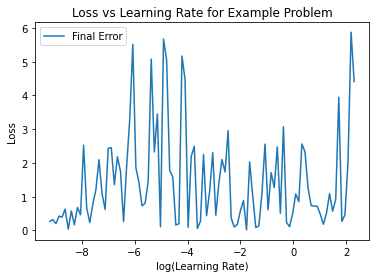

In [16]:
# Define a range of learning rates to test
learning_rates = np.logspace(-4, 1, 100)
final_errors = []

# Call the execute_neural_net function for each learning rate
for lr in learning_rates:
    yp, init_error, final_error = execute_neural_net(lr, 'example')
    final_errors.append(final_error)

# Plot the loss vs learning rate
plot_loss_by_learning_rate(learning_rates, final_errors, title='Loss vs Learning Rate for Example Problem')

### AND Gate

init_error=1.0501616439187285, final_error=0.8149839860977218
init_error=1.1732736213098516, final_error=0.862575250354768
init_error=0.7916445890020054, final_error=0.6605697570932648
init_error=1.209268203984964, final_error=0.8253234364417653
init_error=1.0735350660206728, final_error=0.7364374626999373
init_error=1.0311492506060453, final_error=0.7542662712733106
init_error=1.2290097002232783, final_error=0.7595646384227009
init_error=1.3046968053775536, final_error=0.7726534527888185
init_error=1.035311760903309, final_error=0.72320419871272
init_error=0.9248885951354532, final_error=0.7249943005846202
init_error=0.8159430225168153, final_error=0.6644185417965167
init_error=0.8465341990853994, final_error=0.6009740966761753
init_error=0.7964027230010944, final_error=0.6350846771982415
init_error=0.7855782916533749, final_error=0.6850370055840516
init_error=1.0860904413076016, final_error=0.7951996622288582
init_error=0.8479769840373319, final_error=0.6770505318488855
init_error=0.

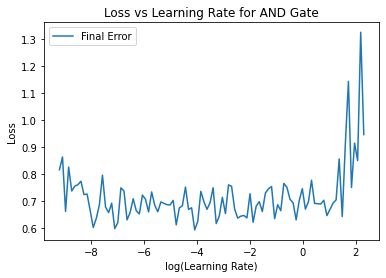

In [17]:
# Define a range of learning rates to test
learning_rates = np.logspace(-4, 1, 100)
final_errors = []

# Call the execute_neural_net function for each learning rate
for lr in learning_rates:
    yp, init_error, final_error = execute_neural_net(lr, 'and')
    final_errors.append(final_error)

# Plot the loss vs learning rate
plot_loss_by_learning_rate(learning_rates, final_errors, title='Loss vs Learning Rate for AND Gate')

### XOR Gate with no hidden layer

XOR using single perceptron:
init_error=0.19488175338587777, final_error=1.0806286747306435
XOR using single perceptron:
init_error=0.23604594155577724, final_error=1.1457296555218994
XOR using single perceptron:
init_error=0.4247218490899999, final_error=0.5023073141278305
XOR using single perceptron:
init_error=0.9293780575424018, final_error=1.0812852237037154
XOR using single perceptron:
init_error=0.24593390016518774, final_error=1.3555468798209158
XOR using single perceptron:
init_error=0.5473510417128358, final_error=1.7488219375034508
XOR using single perceptron:
init_error=0.6235943383853629, final_error=1.375411763747778
XOR using single perceptron:
init_error=0.3711927569816466, final_error=0.40855501259467825
XOR using single perceptron:
init_error=0.18292644029570748, final_error=0.9162922741556601
XOR using single perceptron:
init_error=0.8769163448778992, final_error=1.228416551334675
XOR using single perceptron:
init_error=0.5439366166064721, final_error=1.4024571753781

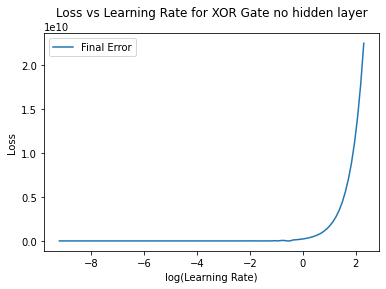

In [18]:
# Define a range of learning rates to test
learning_rates = np.logspace(-4, 1, 100)
final_errors = []

# Call the execute_neural_net function for each learning rate
for lr in learning_rates:
    yp, init_error, final_error = execute_neural_net(lr, 'xor1')
    final_errors.append(final_error)

# Plot the loss vs learning rate
plot_loss_by_learning_rate(learning_rates, final_errors, title='Loss vs Learning Rate for XOR Gate no hidden layer')

### XOR Gate with single hidden layer

XOR using single perceptron:
init_error=0.4822595686664164, final_error=0.4224916505969806
XOR using single perceptron:
init_error=0.44491117041039957, final_error=0.41899978899308316
XOR using single perceptron:
init_error=0.8197515251359695, final_error=0.4763562573893592
XOR using single perceptron:
init_error=0.3724367231599793, final_error=1.5701313029331796
XOR using single perceptron:
init_error=0.5494147210741289, final_error=0.33687831092357085
XOR using single perceptron:
init_error=0.5825510808049282, final_error=1.3784233239397943
XOR using single perceptron:
init_error=0.7007419584895828, final_error=1.1122780051272039
XOR using single perceptron:
init_error=0.28789420125285226, final_error=0.6991245529188181
XOR using single perceptron:
init_error=0.20444936269652692, final_error=0.1396106622825715
XOR using single perceptron:
init_error=0.21082712901281092, final_error=1.5689597960301624
XOR using single perceptron:
init_error=0.18566168716292641, final_error=0.158358255

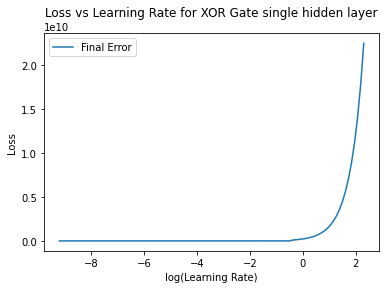

In [19]:
# Define a range of learning rates to test
learning_rates = np.logspace(-4, 1, 100)
final_errors = []

# Call the execute_neural_net function for each learning rate
for lr in learning_rates:
    yp, init_error, final_error = execute_neural_net(lr, 'xor1')
    final_errors.append(final_error)

# Plot the loss vs learning rate
plot_loss_by_learning_rate(learning_rates, final_errors, title='Loss vs Learning Rate for XOR Gate single hidden layer')